In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [19]:
image_name = '../../testImage1.jpg' 

image = cv2.imread(image_name)
type(image)

numpy.ndarray

In [6]:
NUM_IMAGES = 5
SIGMA = 0.005
LINE_EROSION_CONSTANT = (7, 2)

In [4]:
def process_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image - cv2.GaussianBlur(image, (21, 21), 3) + 57
    #image = cv2.bitwise_not(image)
    #image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, -2)

    """
    rows = image.shape[0]
    verticalsize = rows // 70
    verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
    image = cv2.erode(image, verticalStructure)
    image = cv2.dilate(image, verticalStructure)
    """
    #img_blur = cv2.GaussianBlur(image, (3,3), 0) 
    #sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
    """
    median = np.median(image)
    RANGE = 15
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if (image[i][j] - RANGE > median or image[i][j] + RANGE < median):
                image[i][j] = 0
    """

    return image

In [7]:
%matplotlib inline

IMAGE_PATH = "../"

for i in range(1, NUM_IMAGES + 1): 
    image_name = IMAGE_PATH + 'testImage' + str(i)
    if os.path.isfile(image_name + '.jpg'):
        image_name += '.jpg'
    else:
        image_name += '.png'

    image = cv2.imread(image_name)
    processed_image = process_image(image)

    if i == 2:
        cv2.imwrite("./testImage2_processed.png", processed_image)

    plt.figure()
    plt.imshow(processed_image, cmap='gray')

[ WARN:0@347.317] global loadsave.cpp:244 findDecoder imread_('../testImage1.png'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


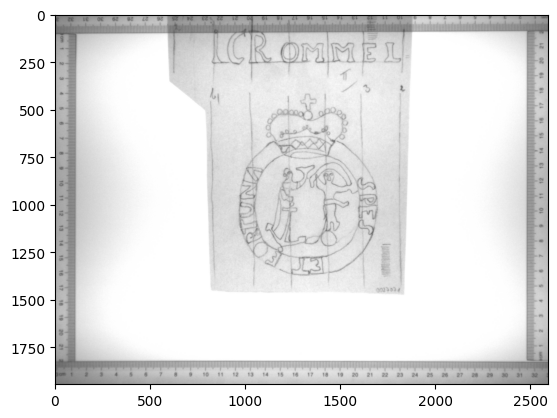

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(img, (3,3), 0) 
plt.imshow(img_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


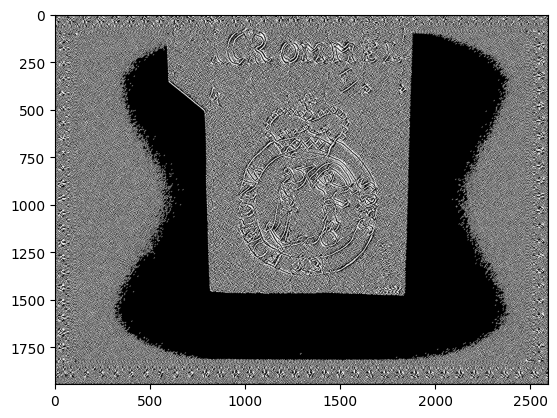

In [5]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

#plt.imshow(sobelx)
#plt.imshow(sobely)
plt.imshow(sobelxy)

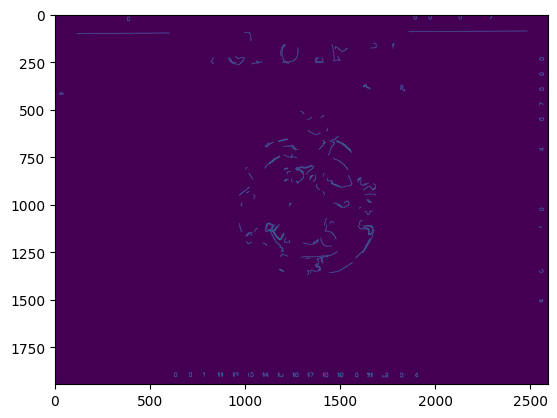

In [6]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)
plt.imshow(edges)

In [4]:
import os
import json

BATCHES_PATH = "../data-annotation/"
BATCHES_FOLDERS_START = "batch-"

annotations = []
for folder in os.listdir(BATCHES_PATH):
    if (folder.startswith(BATCHES_FOLDERS_START)):
        for filename in os.listdir(BATCHES_PATH + folder):
            if (not filename.endswith(".json")):
                continue
                
            with open(BATCHES_PATH + folder + "/" + filename, "r") as f:
                annotation_batch = json.load(f)
                annotations += annotation_batch

print(len(annotations))
print([annotation["id"] for annotation in annotations])

381
381


In [68]:
print(json.dumps(annotations[227]["annotations"][0], indent=4))

{
    "id": 225,
    "completed_by": 1,
    "result": [
        {
            "value": {
                "choices": [
                    "TOW"
                ]
            },
            "id": "vxdyF9WGmG",
            "from_name": "otherOptions",
            "to_name": "image",
            "type": "choices",
            "origin": "manual"
        },
        {
            "original_width": 2592,
            "original_height": 1944,
            "image_rotation": 0,
            "value": {
                "x": 39.220419166252555,
                "y": 13.937589431689043,
                "width": 20.4698561605096,
                "height": 43.40658578061577,
                "rotation": 0,
                "rectanglelabels": [
                    "Watermark"
                ]
            },
            "id": "-Q5_mM5nVt",
            "from_name": "label",
            "to_name": "image",
            "type": "rectanglelabels",
            "origin": "manual"
        }
    ],
    "was_cancelled

ImportError: attempted relative import with no known parent package

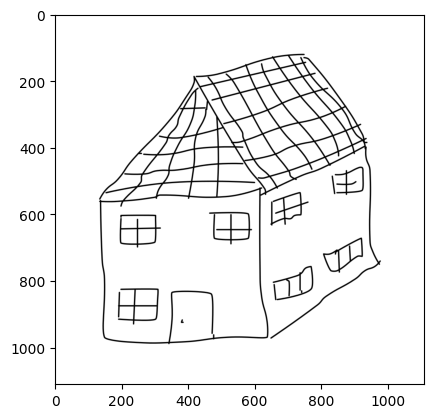

In [15]:
import random
import scipy

IMAGE_PATH = "../../data/sketches_png/png/house/8829.png"
image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [16]:
num_lines_list = [1, 2, 2, 3, 3, 4, 4, 5]
num_lines = random.choice(num_lines_list)
width, height = image.shape
line_distance = int(width / num_lines)
line_thickness = random.randint(5, 10)
top_distance = random.randint(0, 100)
bottom_distance = random.randint(0, 100)

lines_image = np.zeros(image.shape, np.uint8)
for index in range(0, num_lines):
    distance_to_line = index * line_distance + int(line_distance / 2)
    actual_line_thickness = random.randint(-1, 1) + line_thickness
    
    lines_image = cv2.line(lines_image, (distance_to_line, top_distance), (distance_to_line, image.shape[1] - bottom_distance), (255), actual_line_thickness)
    
lines_image = scipy.ndimage.rotate(lines_image, random.randint(-10, 10), reshape=False)
#noisy_lines_image = apply_noise(lines_image)
#plt.imshow(noisy_lines_image, cmap='gray', vmin=0, vmax=255)

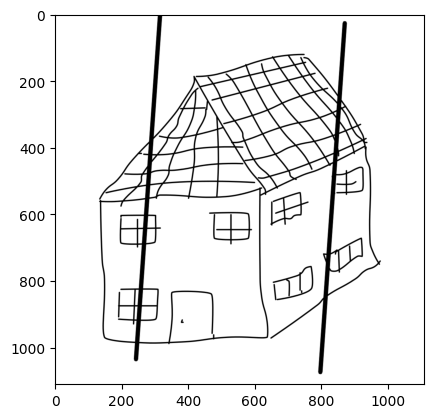

In [25]:
image_with_lines = cv2.bitwise_not(cv2.bitwise_or(cv2.bitwise_not(image), lines_image))
cv2.imwrite("../../Report/images/house_lines.png", image_with_lines)
plt.imshow(image_with_lines, cmap='gray', vmin=0, vmax=255)

In [18]:
def make_lines_grey(image: np.ndarray):
    threshold_value = random.randint(80, 180)
    threshold = np.full((image.shape[0], image.shape[1]), 170, dtype=int)
    return np.clip(image + threshold, 0, 255), threshold_value

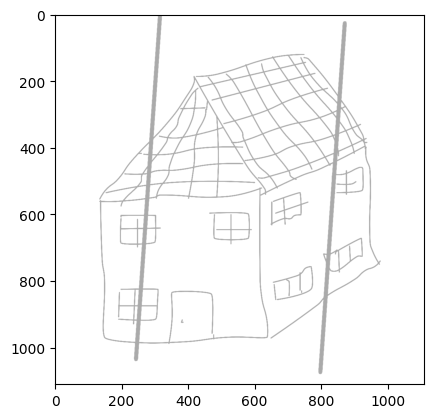

In [19]:
greyed_lines_image, threshold_value = make_lines_grey(image_with_lines)
cv2.imwrite("../../Report/images/house_lines_grey.png", greyed_lines_image)
plt.imshow(greyed_lines_image, cmap='gray', vmin=0, vmax=255)

In [20]:
def apply_noise(image: np.ndarray, max_limit=150):
    noise = 5 + random.randint(50, max_limit) * (np.random.randn(image.shape[0], image.shape[1]) - 0.5)
    noisy_image = np.clip(image + noise, 0, 255)
    
    return noisy_image.astype(np.uint8)

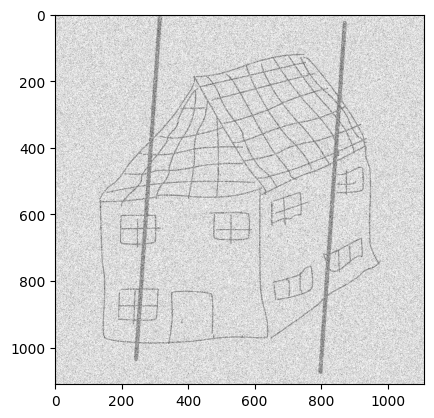

In [21]:
noisy_image = apply_noise(greyed_lines_image, int(threshold_value / 2))        
plt.imshow(noisy_image, cmap='gray', vmin=0, vmax=255)

In [22]:
def apply_blur(image: np.ndarray):
    blurry_image = cv2.GaussianBlur(image, (43, 43), cv2.BORDER_DEFAULT)
    
    return blurry_image

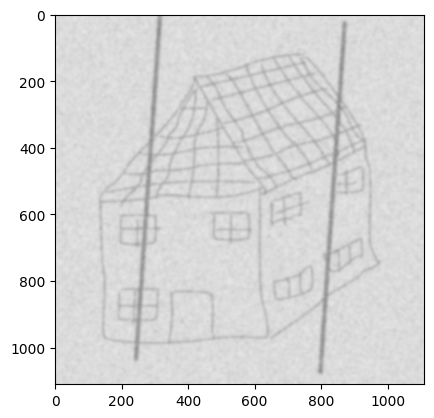

In [23]:
blurry_image = apply_blur(noisy_image)        
cv2.imwrite("../../Report/images/house_noisy.png", blurry_image)
plt.imshow(blurry_image, cmap='gray', vmin=0, vmax=255)

In [78]:
image1 = cv2.imread("../../target.png", cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread("../../source1.png", cv2.IMREAD_GRAYSCALE)

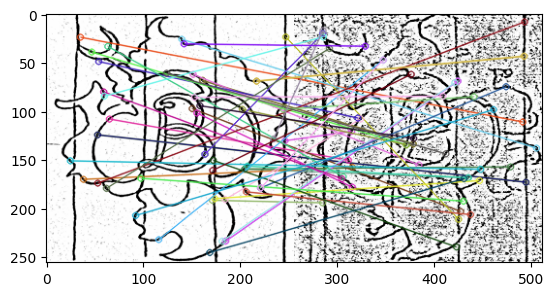

In [80]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
sorted_matches = sorted(matches, key=lambda x: x.distance)

output = cv2.drawMatches(image1, keypoints1, image2, keypoints2, sorted_matches[:50], image2, flags=2)
plt.imshow(output)
plt.show()

Similarities: [-0.0, -0.0, -0.0, -6.091200337539566e-12, -4.37339214549419e-05]


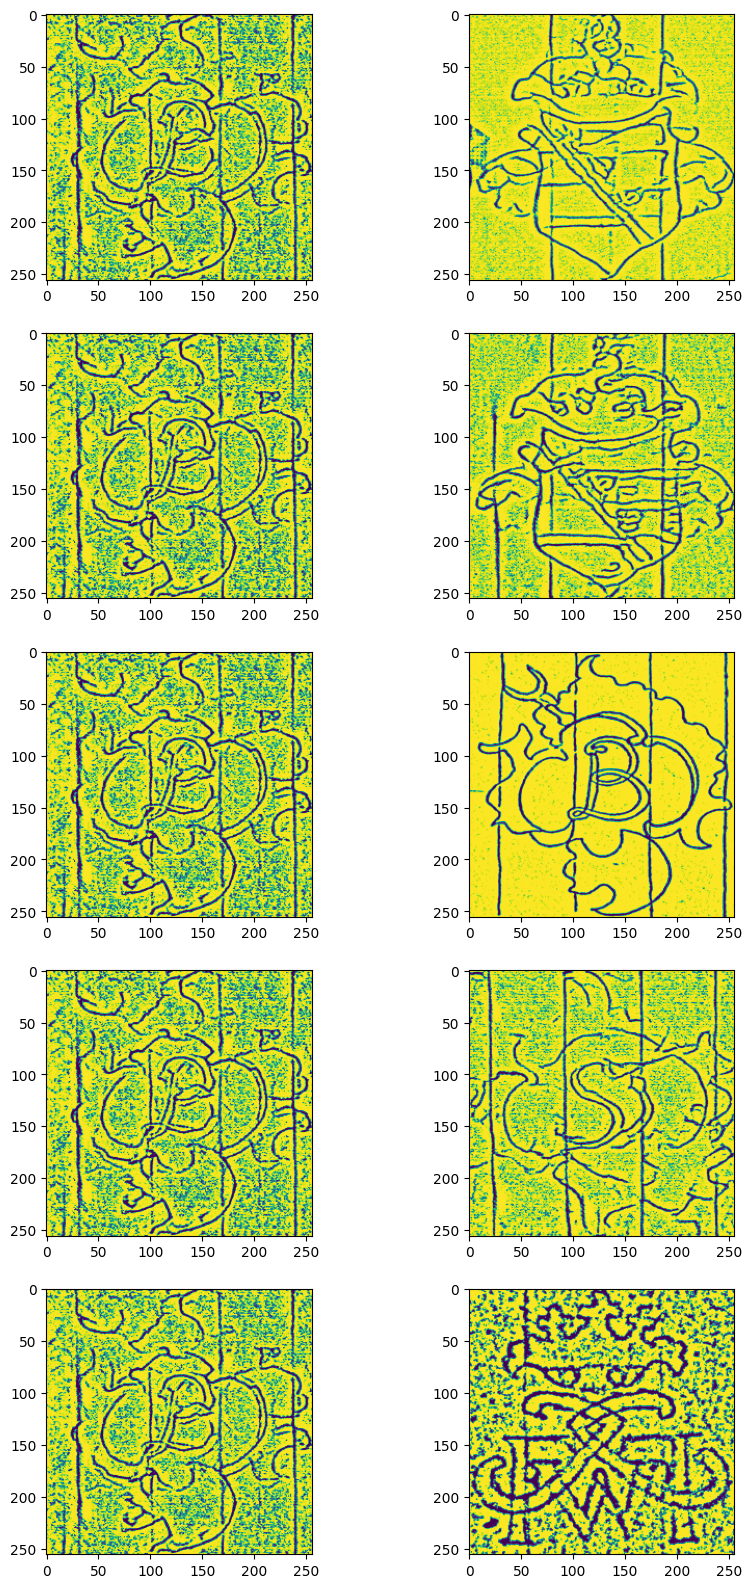

In [15]:
%run ../compare_drawings.py -i ../../target.png

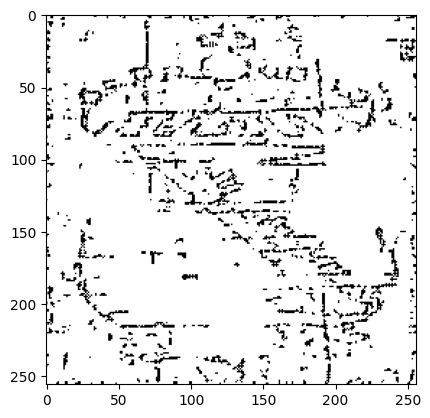

In [72]:
import random
import scipy


kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1,2,2,2,-1],
                             [-1,2,8,2,-1],
                             [-1,2,2,2,-1],
                             [-1,-1,-1,-1,-1]])

def make_black_and_white(image: ndarray):
    result = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

    return result

IMAGE_PATH = "../../data/sketch_postprocess/0004625_1-01-0_fake_B.png"
#RAW_IMAGE_PATH = "../../data/sketch_postprocess/0028572_1-1_real_A.png"
image = cv2.imread(IMAGE_PATH)
image = make_black_and_white(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

#image2 = make_black_and_white(cv2.imread(RAW_IMAGE_PATH, cv2.IMREAD_GRAYSCALE))
#image = cv2.bitwise_not(cv2.bitwise_and(cv2.bitwise_not(image), cv2.bitwise_not(image2)))
#image = cv2.fastNlMeansDenoising(image, 31, 7, 21, 21) 
#image = cv2.filter2D(image, -1, kernel_sharpen_1)
#image = cv2.filter2D(image, -1, kernel_sharpen_2)
image = cv2.filter2D(image, -1, kernel_sharpen_3)
#image = cv2.GaussianBlur(image, (3,3), 0)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

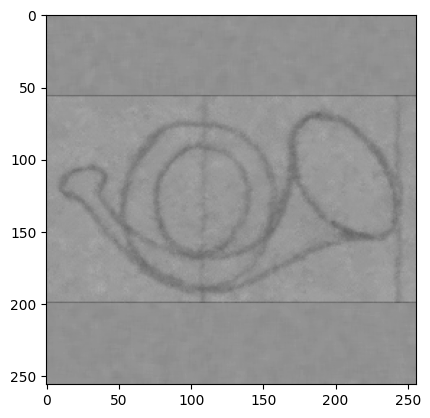

In [56]:
IMAGE_PATH = "../../data/dnb/"
IMG_COL = 256
IMG_ROW = 256

from scipy import ndimage

for image_name in os.listdir(IMAGE_PATH)[:7]:
    image = cv2.imread(os.path.join(IMAGE_PATH, image_name), cv2.IMREAD_GRAYSCALE)
    img = image
    border_v = 0
    border_h = 0
    if (IMG_COL/IMG_ROW) >= (img.shape[0]/img.shape[1]):
        border_v = int((((IMG_COL/IMG_ROW)*img.shape[1])-img.shape[0])/2)
    else:
        border_h = int((((IMG_ROW/IMG_COL)*img.shape[0])-img.shape[1])/2)
        
    img = cv2.copyMakeBorder(image, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, None)
    img = cv2.resize(img, (IMG_ROW, IMG_COL))
    
    noise_window = 12
    noise = np.median(image) + noise_window * (np.random.randn(img.shape[0], img.shape[1]) - 0.5)
    noisy_image = np.clip(noise, 0, 255)
    noisy_image = ndimage.median_filter(noisy_image, size=7)
    final_image = np.where(img == 0, noisy_image, img)
    
    plt.imshow(final_image, cmap='gray', vmin=0, vmax=255)

In [77]:
from scipy.ndimage import median_filter

IMAGE_SIZE = (256, 256)
NOISE_WINDOW = 12
MEDIAN_FILTER_SIZE = 7

def resize_image(image: np.ndarray):
    median = np.median(image)
    vertical_border = 0
    horizontal_border = 0
    size_ratio = IMAGE_SIZE[0] / IMAGE_SIZE[1]

    if size_ratio >= (image.shape[0] / image.shape[1]):
        vertical_border = int((size_ratio * image.shape[1] - image.shape[0]) / 2)
    else:
        horizontal_border = int((size_ratio * image.shape[0] - image.shape[1]) / 2)
    
    image = cv2.copyMakeBorder(image, vertical_border, vertical_border, horizontal_border, horizontal_border, cv2.BORDER_CONSTANT, None)
    image = cv2.resize(image, IMAGE_SIZE)

    noise = median + NOISE_WINDOW * (np.random.randn(image.shape[0], image.shape[1]) - 0.5)
    noise = np.clip(noise, 0, 255)
    noise = median_filter(noise, size = MEDIAN_FILTER_SIZE)
    image = np.where(image == 0, noise, image)

    return image

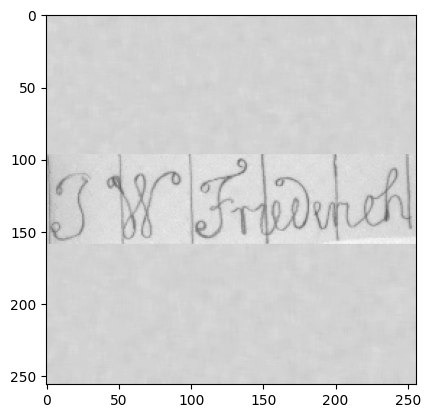

In [78]:
image_name = os.listdir(IMAGE_PATH)[5]
image = cv2.imread(os.path.join(IMAGE_PATH, image_name), cv2.IMREAD_GRAYSCALE)

plt.imshow(resize_image(image), cmap='gray', vmin=0, vmax=255)